<a href="https://colab.research.google.com/github/sammainahkinya1404/Music-Generation-using-RNNs-NN/blob/main/Intro_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install MIT deeplearning library
!pip install mitdeeplearning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117303 sha256=17fd21c5494fe402eaf2f148bedc38f6e5e9753e9aa79c33464f1093771cae0b
  Stored in directory: /root/.cache/pip/wheels/9c/9f/b5/0e31f83bc60a83625e37429f923934e26802d0d68cf3ef3216
Successfully built mitdeeplearning


In [ ]:
# import tensorflow and other dependencies
import mitdeeplearning as mdl
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# rank and shape of a tensor
name=tf.constant("Samson Kinyanjui",tf.string)
number=tf.constant(1.4142135623,tf.float64)
# checking the shape(size and dimension of each tensor)
# checking the rank(0-d)array
print("`name` is a {}-d Tensor".format(tf.rank(name).numpy()),tf.shape(name))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()),tf.shape(number))

`name` is a 0-d Tensor tf.Tensor([], shape=(0,), dtype=int32)
`number` is a 0-d Tensor tf.Tensor([], shape=(0,), dtype=int32)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1-d tensors using vectors and Lists

sport=tf.constant(['Football','Rugby'],tf.string)
numbers=tf.constant([21,25],tf.int32)


# printing the 1-d Tensors
print("`sport` is a {}-d tensor".format(tf.rank(sport).numpy()),tf.shape(sport))
print("`numbers` is a {}-d tensor".format(tf.rank(numbers).numpy()),tf.shape(numbers))



`sport` is a 1-d tensor tf.Tensor([2], shape=(1,), dtype=int32)
`numbers` is a 1-d tensor tf.Tensor([2], shape=(1,), dtype=int32)


In [ ]:
### Defining higher-order Tensors ###
# creating a 2-d Tensor

'''TODO: Define a 2-d Tensor'''
matrix =tf.constant([[25,21,71],[48,56,30]],tf.int32)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
print("`matrix` is a {}-d".format(tf.rank(matrix).numpy()),tf.shape(matrix))

`matrix` is a 2-d tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images =tf.zeros((10,256,256,3),dtype=tf.float32)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [48 56 30]
`column_vector`: [21 56]
`scalar`: 21


**1.2 Computations on Tensors**

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:


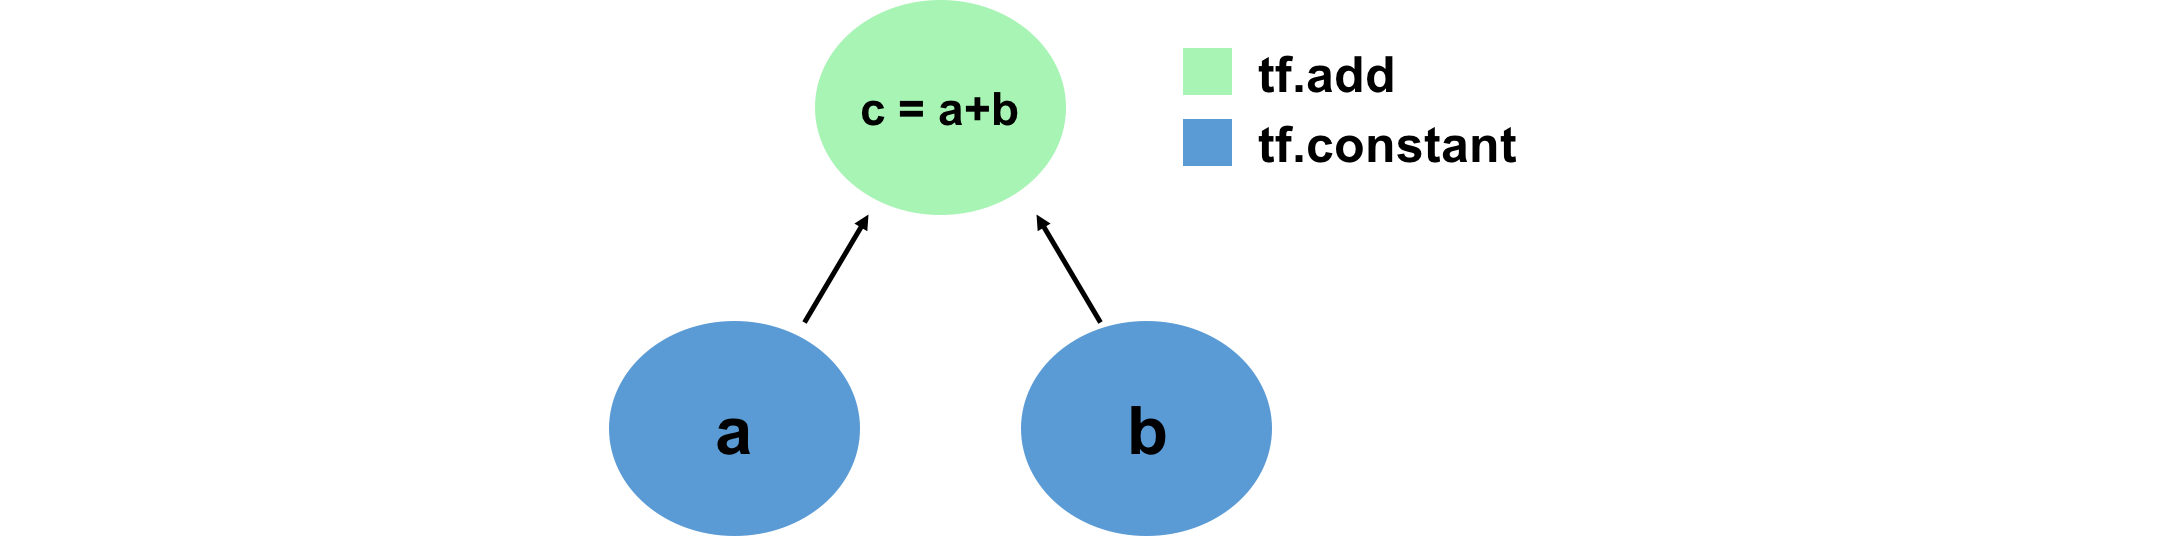

In [ ]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:


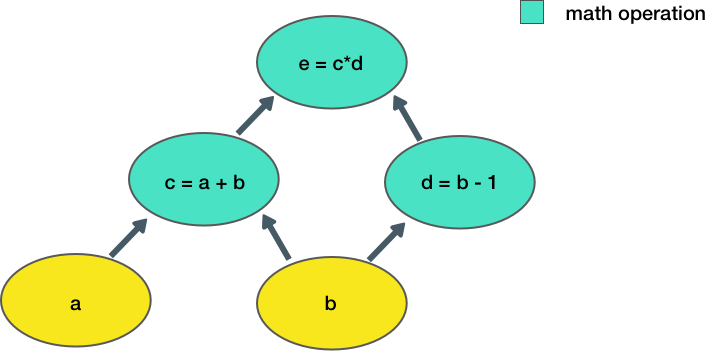




Here, we take two inputs, a, b, and compute an output e. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [ ]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''

  c = tf.add(a,b)# TODO
  d = tf.subtract(b,1)# TODO
  e =tf.multiply(c,d) # TODO
  return e

In [ ]:
# Use case
# Consider example values for a,b
a=1.5
b =2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

**1.3 Neural networks in TensorFlow**

We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer:  y=σ(Wx+b) , where  W  represents a matrix of weights,  b  is a bias,  x  is the input,  σ  is the sigmoid activation function, and  y  is the output. We can also visualize this operation using a graph:

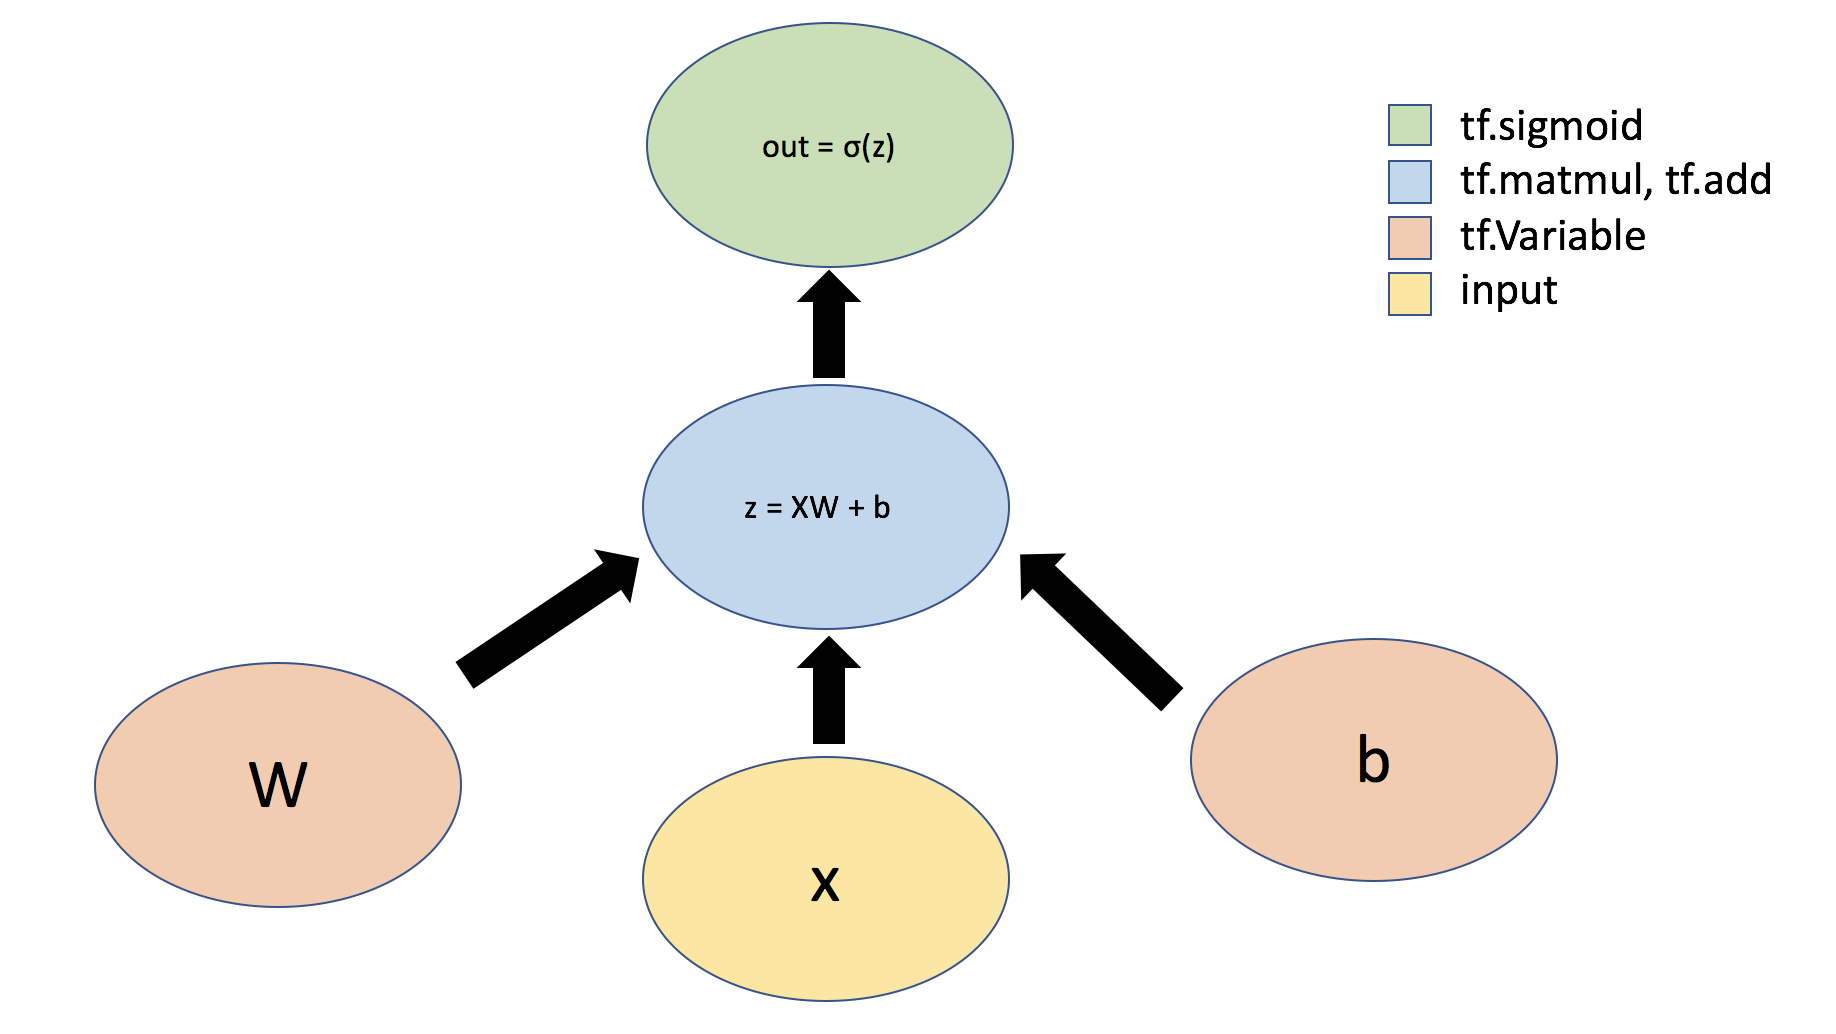

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a Layer to implement the simple perceptron defined above.



In [ ]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x, self.W) + self.b # TODO
    # z = # TODO

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z) # TODO
    # y = # TODO
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
# mdl.lab1.test_custom_dense_layer_output(y)

[[0.5468978  0.1079079  0.20755757]]


Conveniently, TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the Sequential model from Keras and a single Dense layer to define our network. With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.

In [38]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid') # TODO
# dense_layer = # TODO

# Add the dense layer to the model
model.add(dense_layer)


In [39]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy()
# model_output = # TODO
print(model_output)

[[0.4298443 0.8128195 0.26428  ]]


In [40]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.'''
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid') # TODO
    # self.dense_layer = '''TODO: Dense Layer'''

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

In [41]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.5028079 0.6395091 0.8767743]], shape=(1, 3), dtype=float32)


In [42]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  '''TODO: Implement the behavior where the network outputs the input, unchanged, under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity: # TODO
      return inputs # TODO
    return x

  # def call(self, inputs, isidentity=False):
    # TODO

In [43]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input) # TODO
# out_activate = # TODO
out_identity = model.call(x_input, isidentity=True) # TODO
# out_identity = # TODO

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.14238447 0.31598055 0.3135504 ]]; network identity output: [[1. 2.]]


1.4 Automatic differentiation in TensorFlow

Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a persistent gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function  y=x2  and compute the gradient:

In [44]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how GradientTape can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of  L=(x−xf)2 . Here  xf  is a variable for a desired value we are trying to optimize for;  L  represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ( xmin=xf ), considering how we can compute this using GradientTape sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-1.1012203]]


Text(0, 0.5, 'x value')

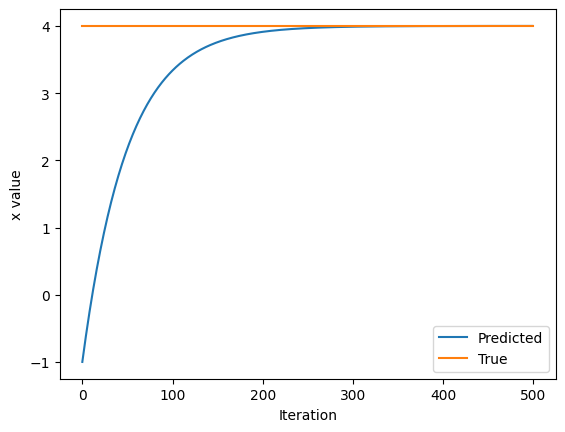

In [45]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f)**2 # "forward pass": record the current loss on the tape
    # loss = # TODO

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

GradientTape provides an extremely flexible framework for automatic differentiation. In order to back propagate errors through a neural network, we track forward passes on the Tape, use this information to determine the gradients, and then use these gradients for optimization using SGD.